In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
# Mount the Google Drive at /content/drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("drive/MyDrive/Nitip/Dataset/mnist_train.csv")

# pisahkan label dan fitur
labels = df.iloc[:, 0].values
data = df.iloc[:, 1:].values.astype(np.float32)

In [ ]:
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


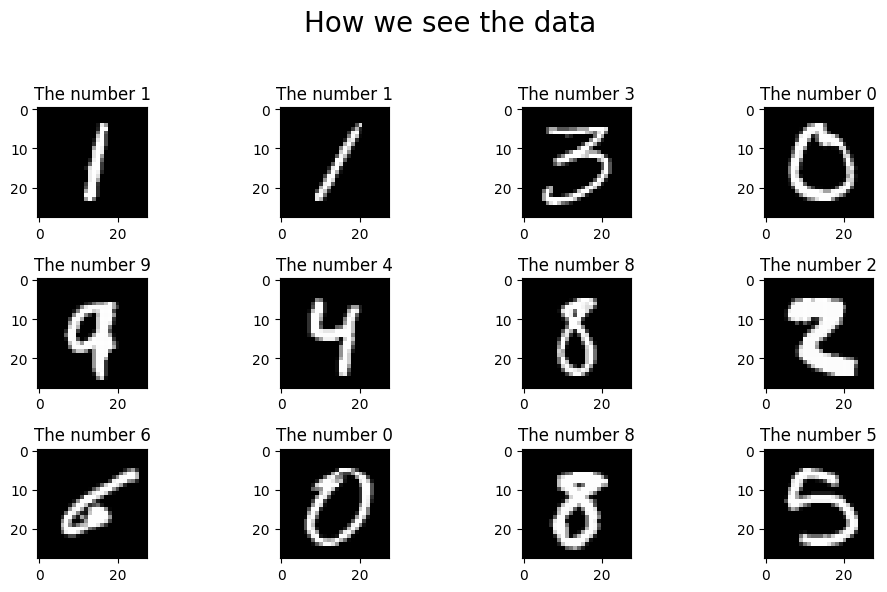

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 4, figsize=(10, 6))

for ax in axs.flatten():
    randimg2show = np.random.randint(0, high=data.shape[0])

    # create the image (reshape inget)
    img = np.reshape(data[randimg2show, :], (28, 28))
    ax.imshow(img, cmap='gray')

    # title
    ax.set_title('The number %i'%labels[randimg2show])

plt.suptitle('How we see the data', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

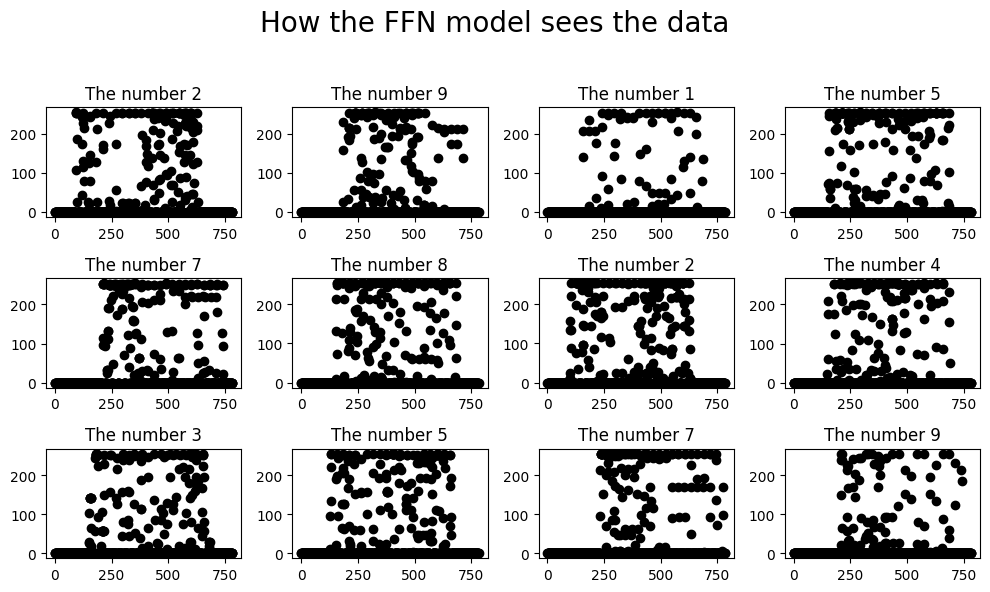

In [ ]:
# show a few random digits
fig,axs = plt.subplots(3,4,figsize=(10,6))

for ax in axs.flatten():
  # pick a random image
  randimg2show = np.random.randint(0,high=data.shape[0])

  # create the image
  ax.plot(data[randimg2show,:],'ko')

  # title
  ax.set_title('The number %i'%labels[randimg2show])

plt.suptitle('How the FFN model sees the data',fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

In [ ]:
# data normalization
dataNorm = data / np.max(data)

# one hot encoding label
def one_hot_encode(y, num_classes=10):
    encoded = np.zeros((y.shape[0], num_classes))
    encoded[np.arange(y.shape[0]), y] = 1
    return encoded

labels_encoded = one_hot_encode(labels)

In [ ]:
labels_encoded[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def train_test_split(X, y, test_size=0.2, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)

    # jumlah sample
    num_sample = X.shape[0]

    # array of index and do shuffling
    indices = np.arange(num_sample)
    np.random.shuffle(indices)

    # hitung jumlah test sample
    test_count = int(num_sample * test_size)

    # bagi index jadi test and train
    test_indices = indices[:test_count]
    train_indices = indices[test_count:]

    # split data dan label sesuai index
    x_train = X[train_indices]
    y_train = y[train_indices]
    x_test = X[test_indices]
    y_test = y[test_indices]

    return x_train, x_test, y_train, y_test

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(dataNorm, labels_encoded, test_size=0.2, random_seed=42)

## *Weight Inisialization*

In [ ]:
input_size = 784
hidden_size = 64
output_size = 10

# inisialisasi weight
np.random.seed(42)
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))

W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))

## Inisialisasi *Activation Function*

In [ ]:
def relu(z):
    return np.maximum(0, z)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [ ]:
def feedforward(x):
    x = x.T
    z1 = np.dot(W1, x) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = softmax(z2.T).T
    return z1, a1, z2, a2

In [ ]:
# ambil satu gambar dari data uji
sample = test_data[4].reshape(-1, 1)
_, _, _, prediction = feedforward(sample.T)

# hasil prediksi
predicted_label = np.argmax(prediction)
actual_data = test_labels[4]

print(f'Prediksi: {predicted_label}, label sebenarnya: {actual_data}')

Prediksi: 5, label sebenarnya: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
def relu_derivative(z):
    return z > 0


def backprop(x, y, z1, a1, z2, a2):
    m = x.shape[1]
    dZ2 = a2 - y
    dW2 = (1/m) * np.dot(dZ2, a1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(z1)
    dW1 = (1/m) * np.dot(dZ1, x.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

In [ ]:
def compute_loss(y_pred, y_true):
    m = y_true.shape[1]
    return -np.sum(y_true * np.log(y_pred + 1e-8)) / m

## *Train Loop*

In [ ]:
losses = []
accuracies = []
learning_rate = 0.1
epochs = 100

for i in range(epochs):
    z1, a1, z2, a2 = feedforward(train_data)
    loss = compute_loss(a2, train_labels.T)
    dW1, db1, dW2, db2 = backprop(train_data.T, train_labels.T, z1, a1, z2, a2)

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    def predict(x):
        return np.argmax(feedforward(x)[-1], axis=0)

    y_pred = predict(test_data)
    y_true = np.argmax(test_labels, axis=1)
    acc = np.mean(y_pred == y_true)

    losses.append(loss)
    accuracies.append(acc)

    print(f'Epochs {i+1}, Loss: {loss:.4f}, Accuracy: {acc:.4f}')

Epochs 1, Loss: 1.0875, Accuracy: 0.7456
Epochs 2, Loss: 1.0739, Accuracy: 0.7488
Epochs 3, Loss: 1.0607, Accuracy: 0.7514
Epochs 4, Loss: 1.0478, Accuracy: 0.7530
Epochs 5, Loss: 1.0353, Accuracy: 0.7553
Epochs 6, Loss: 1.0231, Accuracy: 0.7578
Epochs 7, Loss: 1.0112, Accuracy: 0.7599
Epochs 8, Loss: 0.9996, Accuracy: 0.7628
Epochs 9, Loss: 0.9883, Accuracy: 0.7642
Epochs 10, Loss: 0.9773, Accuracy: 0.7668
Epochs 11, Loss: 0.9665, Accuracy: 0.7685
Epochs 12, Loss: 0.9560, Accuracy: 0.7709
Epochs 13, Loss: 0.9458, Accuracy: 0.7739
Epochs 14, Loss: 0.9358, Accuracy: 0.7763
Epochs 15, Loss: 0.9261, Accuracy: 0.7782
Epochs 16, Loss: 0.9166, Accuracy: 0.7793
Epochs 17, Loss: 0.9073, Accuracy: 0.7812
Epochs 18, Loss: 0.8982, Accuracy: 0.7834
Epochs 19, Loss: 0.8894, Accuracy: 0.7853
Epochs 20, Loss: 0.8807, Accuracy: 0.7870
Epochs 21, Loss: 0.8722, Accuracy: 0.7883
Epochs 22, Loss: 0.8640, Accuracy: 0.7903
Epochs 23, Loss: 0.8559, Accuracy: 0.7917
Epochs 24, Loss: 0.8480, Accuracy: 0.7933
E

In [ ]:
# ambil satu gambar dari data uji
sample = test_data[4].reshape(-1, 1)
_, _, _, prediction = feedforward(sample.T)

# hasil prediksi
predicted_label = np.argmax(prediction)
actual_data = test_labels[4]

print(f'Prediksi: {predicted_label}, label sebenarnya: {actual_data}')

Prediksi: 3, label sebenarnya: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
